In [1]:
import pandas as pd 
import matplotlib 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier

In [2]:
%matplotlib inline

circuits = pd.read_csv('../Group_3_Project-main/F1 CSV Datasets/circuits.csv')
laptimes = pd.read_csv('../Group_3_Project-main/F1 CSV Datasets/lap_times.csv')
pitstops = pd.read_csv('../Group_3_Project-main/F1 CSV Datasets/pit_stops.csv')
seasons = pd.read_csv('../Group_3_Project-main/F1 CSV Datasets/seasons.csv')
status = pd.read_csv('../Group_3_Project-main/F1 CSV Datasets/status.csv')
constructor_standings = pd.read_csv('../Group_3_Project-main/F1 CSV Datasets/constructor_standings.csv')
constructors = pd.read_csv('../Group_3_Project-main/F1 CSV Datasets/constructors.csv')
driver_standings = pd.read_csv('../Group_3_Project-main/F1 CSV Datasets/driver_standings.csv')
drivers = pd.read_csv('../Group_3_Project-main/F1 CSV Datasets/drivers.csv')
races = pd.read_csv('../Group_3_Project-main/F1 CSV Datasets/races.csv')
constructor_results = pd.read_csv('../Group_3_Project-main/F1 CSV Datasets/constructor_results.csv')
results = pd.read_csv('../Group_3_Project-main/F1 CSV Datasets/results.csv')
qualifying = pd.read_csv('../Group_3_Project-main/F1 CSV Datasets/qualifying.csv')
pd.get_option("display.max_columns",None)


20

In [3]:
pd.get_option("display.max_columns",None)
races = races.rename(columns={'name': 'racename'})

# Merge the DataFrames
df = pd.merge(results, races[['raceId', 'year', 'racename', 'round', 'date']], on='raceId', how='left')
df = pd.merge(df, drivers[['driverId', 'driverRef', 'forename', 'surname', 'nationality', 'dob']], on='driverId', how='left')
df = pd.merge(df, constructors[['constructorId', 'name', 'nationality']], on='constructorId', how='left')
df = pd.merge(df, status[['statusId', 'status']], on='statusId', how='left')

# Set display option to show all columns
pd.set_option("display.max_columns", None)

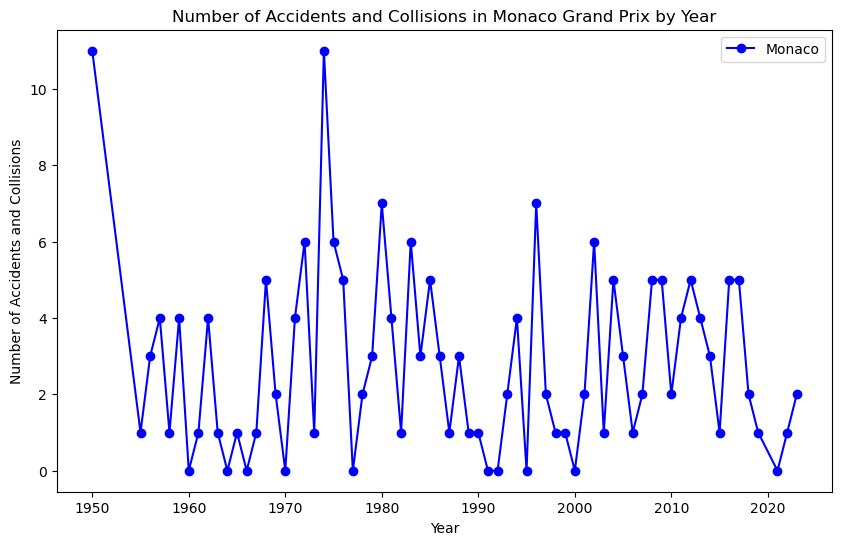

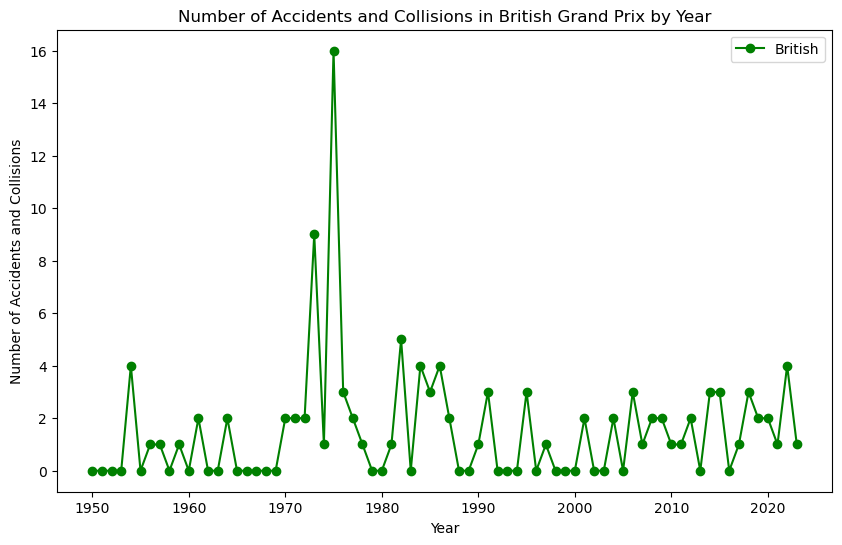

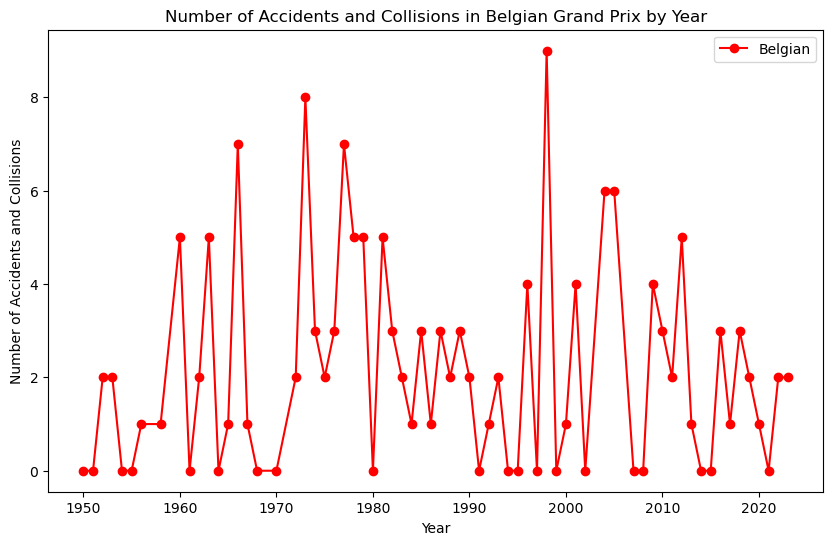

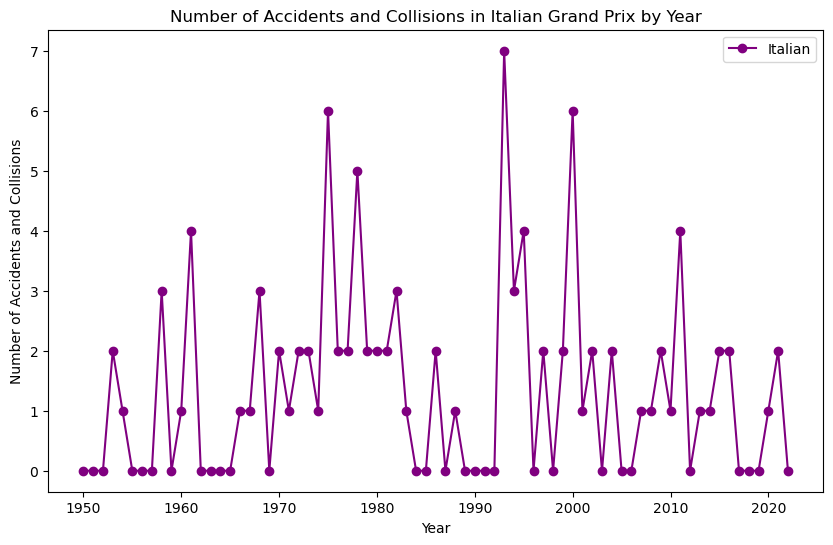

In [4]:
# Define a custom function to count occurrences of 'Accident' and 'Collision'
def count_accidents_collisions(status_column):
    return sum(status_column.str.contains('Accident|Collision', case=False))

# Set a larger figure size
plt.figure(figsize=(10, 6))

# Monaco Grand Prix
monaco_accidents = df[df['racename'] == 'Monaco Grand Prix']
accidents_collision_count_per_year = monaco_accidents.groupby('year')['status'].agg(count_accidents_collisions).reset_index()

# Create a line graph
plt.plot(accidents_collision_count_per_year['year'], accidents_collision_count_per_year['status'], marker='o', label='Monaco', color='blue')
plt.xlabel('Year')
plt.ylabel('Number of Accidents and Collisions')
plt.title('Number of Accidents and Collisions in Monaco Grand Prix by Year')
plt.legend()
plt.show()

# British Grand Prix
british_accidents = df[df['racename'] == 'British Grand Prix']
accidents_collision_count_per_year = british_accidents.groupby('year')['status'].agg(count_accidents_collisions).reset_index()

# Create a line graph
plt.figure(figsize=(10, 6))
plt.plot(accidents_collision_count_per_year['year'], accidents_collision_count_per_year['status'], marker='o', label='British', color='green')
plt.xlabel('Year')
plt.ylabel('Number of Accidents and Collisions')
plt.title('Number of Accidents and Collisions in British Grand Prix by Year')
plt.legend()
plt.show()

# Belgian Grand Prix
belgian_accidents = df[df['racename'] == 'Belgian Grand Prix']
accidents_collision_count_per_year = belgian_accidents.groupby('year')['status'].agg(count_accidents_collisions).reset_index()

# Create a line graph
plt.figure(figsize=(10, 6))
plt.plot(accidents_collision_count_per_year['year'], accidents_collision_count_per_year['status'], marker='o', label='Belgian', color='red')
plt.xlabel('Year')
plt.ylabel('Number of Accidents and Collisions')
plt.title('Number of Accidents and Collisions in Belgian Grand Prix by Year')
plt.legend()
plt.show()

# Italian Grand Prix
italian_accidents = df[df['racename'] == 'Italian Grand Prix']
accidents_collision_count_per_year = italian_accidents.groupby('year')['status'].agg(count_accidents_collisions).reset_index()

# Create a line graph
plt.figure(figsize=(10, 6))
plt.plot(accidents_collision_count_per_year['year'], accidents_collision_count_per_year['status'], marker='o', label='Italian', color='purple')
plt.xlabel('Year')
plt.ylabel('Number of Accidents and Collisions')
plt.title('Number of Accidents and Collisions in Italian Grand Prix by Year')
plt.legend()
plt.show()